In [2]:
import tensorflow as tf

In [3]:
import tensorflow as tf
from tensorflow import keras
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
tf.test.is_built_with_cuda()
print(tf.version.VERSION)
import sys
sys.version

Num GPUs Available:  1
2.5.0


'3.8.10 (default, May 19 2021, 13:12:57) [MSC v.1916 64 bit (AMD64)]'

In [4]:
from tensorflow.python.client import device_lib 
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 8964233158436457905
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 7801405440
locality {
  bus_id: 1
  links {
  }
}
incarnation: 3571701692731069086
physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 3080, pci bus id: 0000:2d:00.0, compute capability: 8.6"
]


In [5]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [6]:
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  1


In [7]:
print(tf.__version__)

2.5.0


In [8]:
import numpy as np
import matplotlib.pyplot as plt

In [9]:
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout

In [10]:
from tensorflow.keras.models import Model

In [11]:
fashion_mnist = tf.keras.datasets.fashion_mnist

In [12]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [13]:
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)


In [14]:
K = len(set(y_train))
print("number of classes", K)

number of classes 10


In [15]:
# build the model using functional API

i = Input(shape=x_train[0].shape)
x = Conv2D(32, (3,3), strides = 2, activation='relu')(i)
x = Conv2D(64, (3,3), strides = 2, activation='relu')(x)
x = Conv2D(128, (3,3), strides = 2, activation='relu')(x)
x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation='softmax')(x)

model = Model(i, x)

In [16]:
# Compile and fit
# Note: make sure you are using the GPU for this!
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 183s 3ms/step - loss: 0.5699 - accuracy: 0.8031 - val_loss: 0.4216 - val_accuracy: 0.8372
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4008 - accuracy: 0.8518 - val_loss: 0.3836 - val_accuracy: 0.8602
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3639 - accuracy: 0.8638 - val_loss: 0.3725 - val_accuracy: 0.8646
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3446 - accuracy: 0.8699 - val_loss: 0.3672 - val_accuracy: 0.8655
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3234 - accuracy: 0.8779 - val_loss: 0.3727 - val_accuracy: 0.8643
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3122 - accuracy: 0.8830 - val_loss: 0.3511 - val_accuracy: 0.8726
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2973 - accuracy: 0.8875 - val_loss: 0.3634 - val_accurac

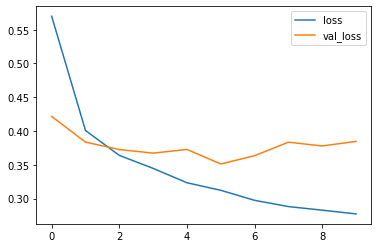

In [17]:
# Plot loss per iteration
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

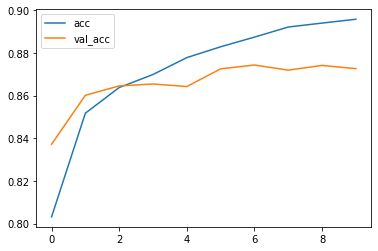

In [18]:
# Plot accuracy per iteration
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()


Confusion matrix, without normalization
[[886   2  23  28   4   0  50   0   7   0]
 [  0 974   2  18   2   0   1   0   3   0]
 [ 23   1 811  12  82   0  70   0   1   0]
 [ 17   7  21 903  28   0  20   0   4   0]
 [  2   1  81  37 761   1 115   0   2   0]
 [  0   1   0   1   0 969   0  20   5   4]
 [188   4 101  38  75   0 576   0  18   0]
 [  0   0   0   0   0  23   0 959   0  18]
 [  1   4   5   3   7   6   7   2 965   0]
 [  1   0   0   1   0  11   0  64   0 923]]


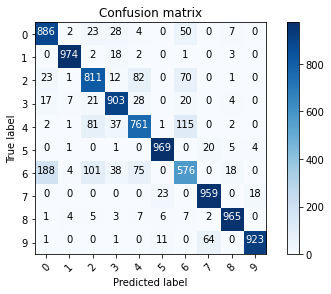

In [20]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()


p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))


In [21]:
# Label mapping
labels = '''T-shirt/top
Trouser
Pullover
Dress
Coat
Sandal
Shirt
Sneaker
Bag
Ankle boot'''.split("\n")

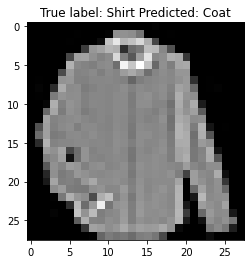

In [27]:
# Show some misclassified examples
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i].reshape(28,28), cmap='gray')
plt.title("True label: %s Predicted: %s" % (labels[y_test[i]], labels[p_test[i]]));